$$y1 = sqrt(-2 * ln(x1)) * cos( 2 * pi * x2)$$
$$y1 = sqrt(-2 * ln(x1)) * sin( 2 * pi * x2)$$

In [36]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
def gauss1():
    x1 = random.random()
    x2 = random.random()
    return (-2 * math.log(x1))**0.5 * math.cos( 2 * math.pi * math.log(x2) )

def gauss2():
    x1 = random.random()
    x2 = random.random()
    return (-2 * math.log(x1))**0.5 * math.sin( 2 * math.pi * math.log(x2) )

(0, 0.5)

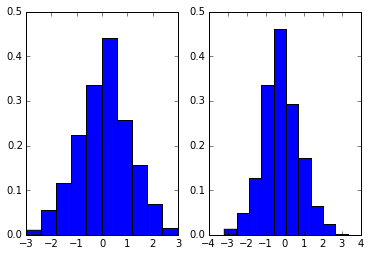

In [43]:
n = 1000
X = [gauss1() for dummyNum in range(n)]
Y = [gauss2() for dummyNum in range(n)]

fig, ax = plt.subplots(1, 2)
ax[0].hist(X, normed = True)
ax[1].hist(Y, normed = True)
ax[0].set_ylim(0, 0.5)
ax[1].set_ylim(0, 0.5)

In [44]:
X = np.array(X)
Y = np.array(Y)

print("Mean of X: ", np.mean(X), "  Variance of X: ", np.var(X))
print("Mean of Y: ", np.mean(Y), "  Variance of Y: ", np.var(Y))

Mean of X:  0.0780736299119   Variance of X:  1.01561755096
Mean of Y:  -0.198390842782   Variance of Y:  0.918216507705


In [50]:
def process(n):
    return np.array([gauss1() for dummyNum in range(n)])

In [115]:
timePointNum = 5
sampleSize = 2
result = np.array([process(timePointNum) for dummyNum in range(sampleSize)])
result

array([[-0.19721566,  1.52160693,  0.18643559, -0.349585  , -2.06283272],
       [ 1.55538555, -0.66315642,  1.2395127 ,  0.14990262, -0.33463604]])

In [116]:
np.mean(result, axis = 0)

array([ 0.67908494,  0.42922526,  0.71297414, -0.09984119, -1.19873438])

In [117]:
np.cov(result.T)

array([[ 1.53580549, -1.91450944,  0.9228121 ,  0.4377013 ,  1.51441979],
       [-1.91450944,  2.38659544, -1.15036213, -0.54563111, -1.88785037],
       [ 0.9228121 , -1.15036213,  0.5544857 ,  0.26299949,  0.90996218],
       [ 0.4377013 , -0.54563111,  0.26299949,  0.12474394,  0.43160642],
       [ 1.51441979, -1.88785037,  0.90996218,  0.43160642,  1.49333187]])

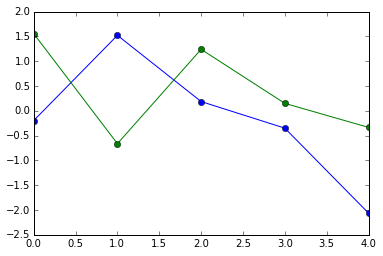

In [118]:
plt.plot(result.T, '-o')
plt.set_xticks = np.arange(timePointNum) * 0.01

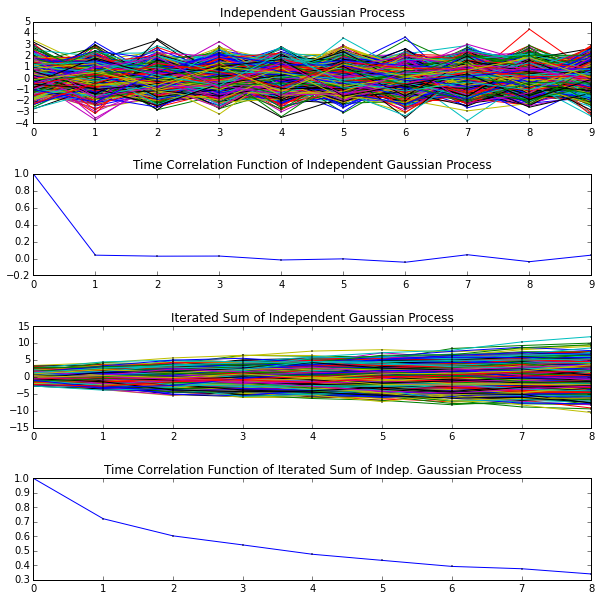

In [120]:
# create data matrix
timePointNum = 10
sampleSize = 1000
result1 = np.array([process(timePointNum) for dummyNum in range(sampleSize)])

# mean and covariance
#print("Mean")
#print(np.mean(result, axis = 0))

#print("Covariance")
CORR1 = np.corrcoef(result1.T)

#
result2 = np.array([[sum(result1[sample,0:idx]) for idx in range(1, timePointNum)] for sample in range(sampleSize)])
CORR2 = np.corrcoef(result2.T)
   
# plot the process
fig, ax = plt.subplots(4, 1, figsize=(10,10))
plt.subplots_adjust(hspace = 0.5)

ax[0].plot(result1.T, '-o', markersize = 1)
ax[0].set_title("Independent Gaussian Process")
ax[0].set_xticks = np.arange(timePointNum) * 0.01

ax[1].plot(CORR1[0,:], '-o', markersize = 1)
ax[1].set_title("Time Correlation Function of Independent Gaussian Process")

ax[2].plot(result2.T, '-o', markersize = 1)
ax[2].set_title("Iterated Sum of Independent Gaussian Process")

ax[3].plot(CORR2[0,:], '-o', markersize = 1)
ax[3].set_title("Time Correlation Function of Iterated Sum of Indep. Gaussian Process")